In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# analysing data


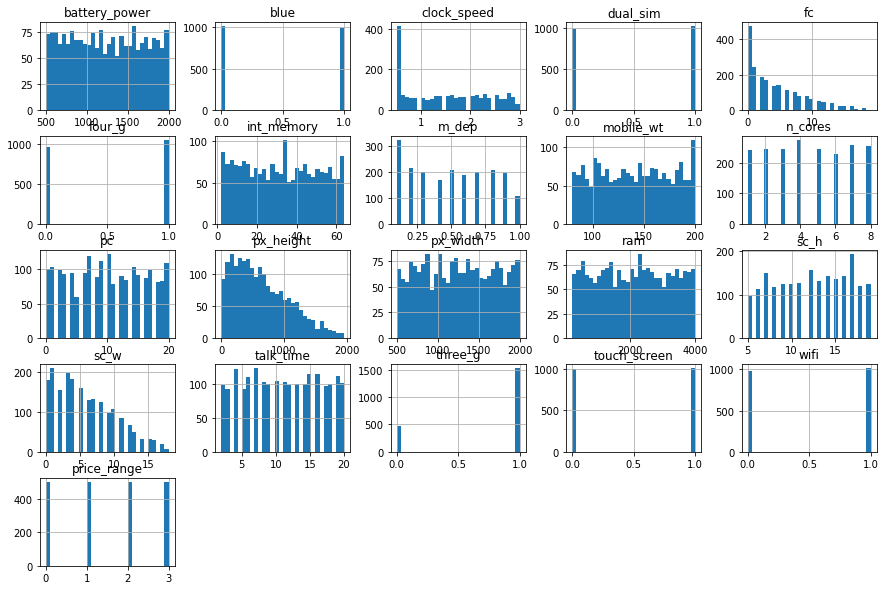

In [8]:
data.hist(bins=30,figsize=(15,10))
plt.show()

In [9]:
corelation=data.corr()

In [10]:
corelation

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


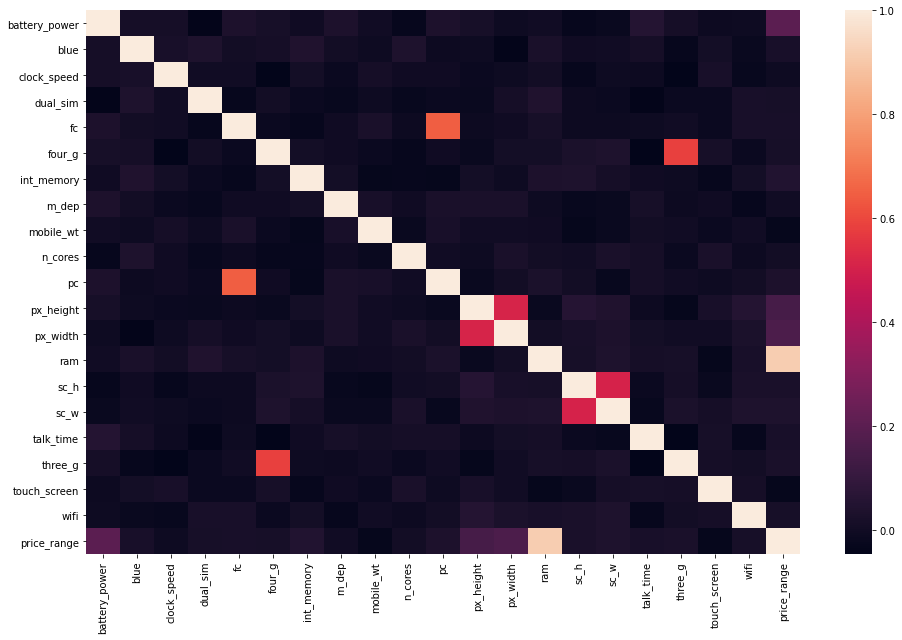

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr())
plt.show()

In [12]:
price_relation=corelation[["price_range"]]

In [13]:
price_relation

,price_range
battery_power,0.200723
blue,0.020573
clock_speed,-0.006606
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
m_dep,0.000853
mobile_wt,-0.030302
n_cores,0.004399


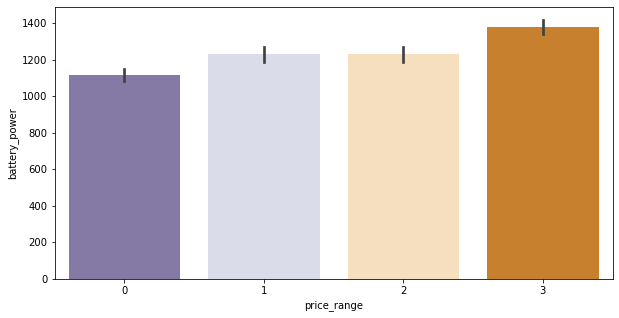

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x="price_range",y="battery_power",data = data, palette = "PuOr_r")
plt.show()

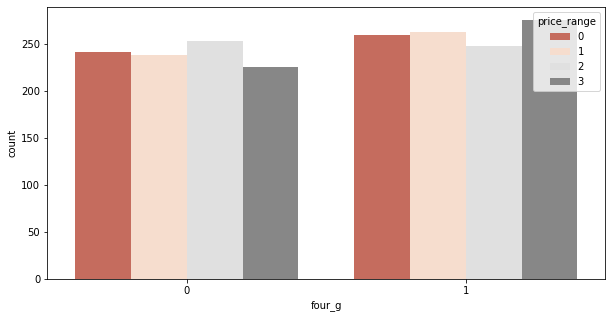

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x=data["four_g"],hue=data["price_range"],palette = "RdGy")
plt.show()

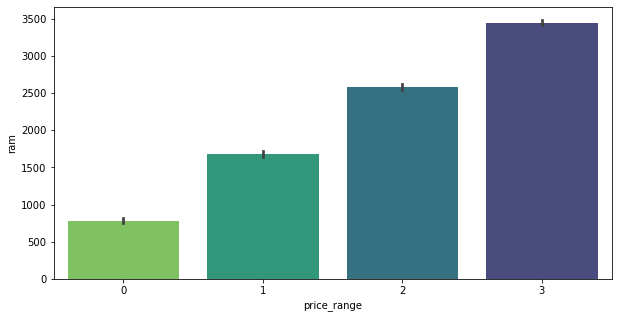

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x="price_range",y="ram",data = data, palette = "viridis_r")
plt.show()

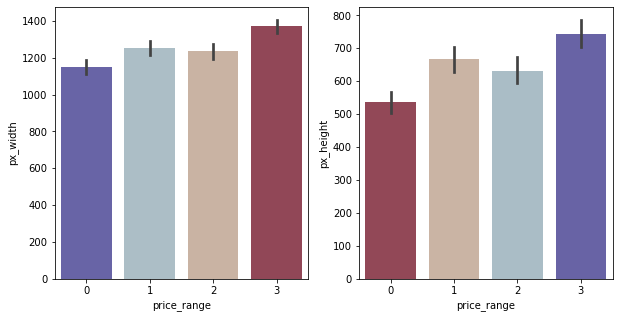

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x="price_range",y="px_width",data=data,palette="twilight_shifted")
plt.subplot(1,2,2)
sns.barplot(x="price_range",y="px_height",data=data,palette="twilight_shifted_r")
plt.show()

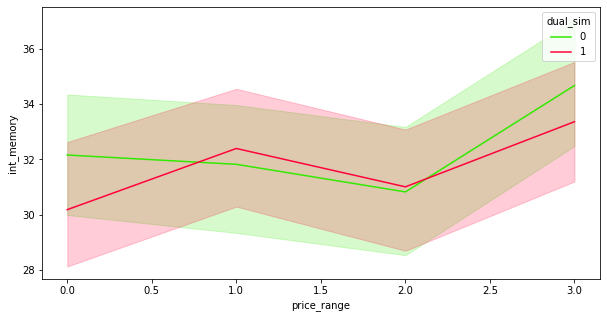

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x="price_range",y="int_memory",data = data,hue="dual_sim",palette = "prism")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


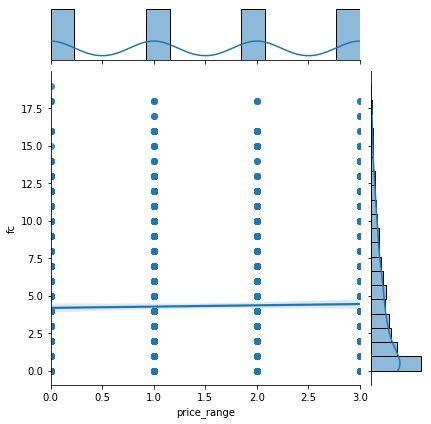

In [19]:
sns.jointplot("price_range","fc",data=data,kind="reg")
plt.show()

# train_test_split

In [20]:
X = data[["battery_power","clock_speed","dual_sim","fc","four_g","int_memory","m_dep","mobile_wt","n_cores","px_height","px_width","ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi"]]
y = data[["price_range"]]

In [21]:
X

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1
1,1021,0.5,1,0,1,53,0.7,136,3,905,1988,2631,17,3,7,1,1,0
2,563,0.5,1,2,1,41,0.9,145,5,1263,1716,2603,11,2,9,1,1,0
3,615,2.5,0,0,0,10,0.8,131,6,1216,1786,2769,16,8,11,1,0,0
4,1821,1.2,0,13,1,44,0.6,141,2,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,1,0,1,2,0.8,106,6,1222,1890,668,13,4,19,1,1,0
1996,1965,2.6,1,0,0,39,0.2,187,4,915,1965,2032,11,10,16,1,1,1
1997,1911,0.9,1,1,1,36,0.7,108,8,868,1632,3057,9,1,5,1,1,0
1998,1512,0.9,0,4,1,46,0.1,145,5,336,670,869,18,10,19,1,1,1


In [22]:
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [23]:
X.shape

(2000, 18)

In [24]:
y.shape

(2000, 1)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [26]:
X_train.shape

(1600, 18)

In [27]:
X_train

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
668,1677,1.8,1,4,0,11,0.7,124,6,271,1477,3771,15,6,12,1,0,0
1345,947,0.5,0,1,1,51,0.1,144,2,193,887,2915,17,1,6,1,1,1
373,1067,1.7,1,0,0,58,0.5,135,7,79,681,706,12,9,16,0,1,0
1388,1924,0.5,0,3,1,63,0.3,111,2,122,686,3423,13,3,19,1,0,0
132,645,0.5,0,1,0,41,1.0,197,7,327,580,2962,12,9,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,1166,0.5,0,7,0,59,0.5,80,1,437,638,3887,8,6,7,1,0,1
1862,1043,2.7,0,3,0,29,0.2,83,8,887,893,1183,5,3,8,1,0,0
1361,1549,1.5,1,0,1,27,0.4,113,5,632,1162,436,10,8,11,1,0,0
1547,1611,0.5,1,4,1,27,0.9,199,1,163,1011,3078,15,2,6,1,0,1


In [28]:
y_train.shape

(1600, 1)

In [29]:
y_train

,price_range
668,3
1345,2
373,0
1388,3
132,2
...,...
1599,3
1862,0
1361,0
1547,2


# algorithms

In [30]:
support_vector1 = SVC()

In [31]:
support_vector1.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [32]:
predictions1 = support_vector1.predict(X_test)

In [33]:
predictions1

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 3, 0,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 1, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 3, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 1, 2, 1, 3, 1, 3, 1, 0, 3, 1,
       1, 2, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 1, 0, 2, 0, 0, 1, 3, 3, 0,
       1, 0, 2, 1, 0, 2, 3, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 3, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 1, 3,

In [34]:
support_vector1.score(X_test,y_test)

0.95

In [35]:
support_vector2 = SVC(kernel="linear",C=1)

In [36]:
support_vector2.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, kernel='linear')

In [37]:
predictions2 = support_vector2.predict(X_test)

In [38]:
predictions2

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 2, 1, 1, 2, 3, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 1, 1, 2, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 1, 3, 1, 0, 3, 3, 2, 3, 1, 2, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 3, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 1, 2, 1, 3, 1, 3, 1, 0, 3, 1,
       2, 2, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2,
       1, 2, 0, 3, 3, 2, 3, 3, 2, 2, 1, 2, 3, 1, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 1, 3, 2, 1, 2, 2, 2, 0, 3, 1, 3, 1, 2, 3, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 2, 3,

In [39]:
support_vector2.score(X_test,y_test)

0.96

In [40]:
logistic_model1 = LogisticRegression()

In [41]:
logistic_model1.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
logistic_predictions1 = logistic_model1.predict(X_test)

In [43]:
logistic_predictions1

array([2, 2, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1,
       3, 2, 3, 2, 2, 1, 0, 0, 2, 2, 0, 0, 3, 0, 1, 0, 0, 1, 0, 3, 3, 3,
       3, 1, 1, 2, 3, 1, 0, 2, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0,
       0, 1, 0, 2, 2, 1, 3, 2, 3, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 3, 1, 2,
       0, 0, 3, 3, 0, 1, 0, 3, 2, 0, 1, 3, 1, 2, 3, 3, 0, 3, 0, 0, 3, 0,
       1, 0, 3, 2, 2, 3, 2, 3, 1, 0, 3, 3, 3, 3, 2, 2, 3, 3, 1, 1, 0, 0,
       1, 1, 0, 2, 3, 0, 3, 2, 3, 3, 0, 1, 0, 1, 1, 3, 3, 0, 2, 1, 2, 1,
       3, 1, 2, 1, 3, 1, 1, 1, 2, 2, 0, 2, 1, 0, 3, 3, 1, 3, 1, 3, 2, 2,
       2, 3, 3, 3, 1, 1, 1, 0, 3, 3, 1, 3, 0, 1, 1, 0, 3, 3, 0, 1, 0, 0,
       3, 0, 0, 1, 3, 2, 2, 3, 0, 3, 2, 3, 1, 2, 2, 3, 0, 3, 0, 1, 3, 1,
       1, 2, 3, 0, 1, 3, 2, 0, 3, 2, 1, 1, 0, 2, 0, 3, 0, 3, 2, 0, 3, 1,
       1, 3, 0, 3, 2, 2, 3, 3, 2, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 3, 0,
       0, 0, 1, 2, 1, 3, 2, 1, 3, 1, 2, 3, 2, 3, 1, 3, 2, 3, 1, 2, 3, 3,
       2, 1, 2, 3, 3, 3, 0, 2, 1, 0, 3, 1, 0, 2, 3,

In [44]:
logistic_model1.score(X_test,y_test)

0.62

In [45]:
neighbors_model1 = KNeighborsClassifier()

In [46]:
neighbors_model1.fit(X_train,y_train)

<ipython-input-46-551185ea0071>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neighbors_model1.fit(X_train,y_train)


KNeighborsClassifier()

In [47]:
neighbor_predictions1=neighbors_model1.predict(X_test)

In [48]:
neighbor_predictions1

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 1, 1, 3, 3, 1, 0, 0, 2, 3, 3, 3, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 3, 2, 2, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 1, 2, 1, 3, 1, 3, 1, 0, 3, 1,
       1, 2, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 3, 3, 2, 3, 3, 1, 2, 1, 1, 3, 2, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 2, 1, 0, 2, 3, 0, 3, 2, 1, 2, 1, 2, 1, 2, 2, 3, 1, 2, 2, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 2, 3,

In [49]:
neighbors_model1.score(X_test,y_test)

0.9375

In [50]:
neighbors_model2 = KNeighborsClassifier(n_neighbors=21)

In [51]:
neighbors_model2.fit(X_train,y_train)

<ipython-input-51-9eb29f45e5c1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neighbors_model2.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=21)

In [52]:
neighbor_predictions2=neighbors_model2.predict(X_test)

In [53]:
neighbor_predictions2

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 3, 0,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 1, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 1, 1, 1, 3, 1, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 1, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 1, 3, 2, 1, 2, 1, 2, 0, 3, 2, 3, 1, 2, 3, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 1, 3,

In [54]:
neighbors_model2.score(X_test,y_test)

0.93

In [55]:
random_model1 = RandomForestClassifier()

In [56]:
random_model1.fit(X_train,y_train)

<ipython-input-56-df85f52969af>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model1.fit(X_train,y_train)


RandomForestClassifier()

In [57]:
random_predictions1 = random_model1.predict(X_test)

In [58]:
random_predictions1

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 3, 0,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 1, 2, 3, 3, 1, 0, 1, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 1, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 2, 2, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 2, 3, 1, 0, 3, 3, 2, 3, 1, 2, 3, 2, 1, 1, 0, 0,
       0, 1, 0, 2, 3, 0, 2, 2, 1, 3, 0, 1, 0, 0, 1, 3, 3, 0, 3, 1, 2, 2,
       3, 3, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       1, 2, 3, 1, 1, 1, 0, 1, 3, 3, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 1, 1, 3, 2, 1, 3, 0, 3, 2, 2, 1, 1, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 1, 2, 0, 2, 1, 3, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 2, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 1, 3,

In [59]:
random_model1.score(X_test,y_test)

0.8775

In [60]:
random_model2 = RandomForestClassifier(criterion="entropy",n_estimators=425)

In [61]:
random_model2.fit(X_train,y_train)

<ipython-input-61-12826696ed8b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model2.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=425)

In [62]:
random_predictions2 = random_model2.predict(X_test)

In [63]:
random_predictions2

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1,
       2, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 1, 2, 3, 3, 1, 0, 1, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 1, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 2, 3, 1, 0, 3, 3, 2, 3, 1, 2, 3, 2, 1, 1, 0, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 3, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 2, 3,
       2, 2, 3, 2, 1, 1, 0, 1, 3, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 1, 2, 3, 2, 1, 3, 0, 3, 2, 2, 2, 1, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 1, 2, 0, 2, 1, 3, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 3, 3, 2, 3, 3, 1, 3, 1, 2, 3, 2, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 3, 0, 2, 3, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 1, 3,

In [64]:
random_model2.score(X_test,y_test)

0.8875

In [65]:
decision_model1 = DecisionTreeClassifier()

In [66]:
decision_model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
decision_predictions1 = decision_model1.predict(X_test)

In [68]:
decision_predictions1

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 3, 0,
       2, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 3, 3, 2,
       2, 0, 1, 3, 3, 1, 0, 1, 2, 3, 3, 2, 1, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 2, 2, 0, 2, 0, 0, 2, 1, 3, 2, 2, 2,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 1, 0, 3, 3, 1, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       1, 1, 0, 2, 3, 0, 2, 3, 2, 3, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 3, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 1, 1, 1, 0, 1, 3, 2, 1, 2, 1, 3, 1, 0, 2, 2, 0, 3, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 2, 2, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 0, 1, 0, 2, 1, 3, 0, 2, 1, 0, 1, 2,
       1, 3, 0, 3, 3, 2, 3, 3, 1, 2, 1, 2, 3, 2, 1, 3, 0, 1, 1, 3, 3, 0,
       1, 0, 2, 1, 0, 2, 3, 1, 3, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 2, 3, 2,
       2, 1, 3, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 1, 3,

In [69]:
decision_model1.score(X_test,y_test)

0.8275

In [70]:
decision_model2 = DecisionTreeClassifier(criterion="entropy")

In [71]:
decision_model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [72]:
decision_prediction2 = decision_model2.predict(X_test)

In [73]:
decision_prediction2

array([1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 3, 0,
       2, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2,
       3, 1, 1, 3, 3, 1, 0, 0, 2, 2, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 1, 0, 3, 3, 1, 3, 1, 2, 3, 2, 1, 1, 1, 0,
       1, 1, 0, 2, 3, 0, 2, 3, 2, 3, 0, 0, 0, 1, 1, 3, 3, 0, 3, 1, 3, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 1, 1, 1, 1, 3, 2, 1, 2, 0, 3, 1, 0, 2, 3, 0, 2, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 2, 2, 1, 3, 1, 3, 1, 0, 3, 1,
       1, 2, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 2, 1, 3, 1, 2, 2, 0, 2, 2,
       1, 3, 0, 3, 3, 2, 3, 3, 1, 2, 1, 2, 3, 1, 0, 2, 0, 0, 2, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 1, 3, 2, 1, 1, 2, 2, 1, 3, 2, 3, 1, 2, 2, 2,
       2, 1, 3, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 2, 3,

In [74]:
decision_model2.score(X_test,y_test)

0.8675

# accuracy

In [75]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        94
           1       0.92      0.96      0.94       102
           2       0.96      0.92      0.94       120
           3       0.98      0.98      0.98        84

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [76]:
accuracy_score(y_test,predictions2)

0.96

In [77]:
confusion_matrix(y_test,predictions2)

array([[ 94,   0,   0,   0],
       [  1,  98,   3,   0],
       [  0,   8, 110,   2],
       [  0,   0,   2,  82]], dtype=int64)

# saving the model

In [78]:
pickle.dump(support_vector2,open("MOBILE_PREDICTION.pkl","wb"))

In [79]:
mobile_prediction_model = pickle.load(open("MOBILE_PREDICTION.pkl","rb"))

# testing of model


In [81]:
mobile_prediction_model.predict([[1368,0.5,0,10,1,42,0.2,91,1,907,925,1590,12,0,14,1,0,0]])

array([1], dtype=int64)

In [85]:
mobile_prediction_model.predict([[697,2.7,1,5,1,20,0.4,173,2,478,1477,259,12,6,4,1,1,1]])

array([0], dtype=int64)

In [98]:
sns.lineplot(x = predictions2 , y = y_test)

ValueError: Shape of passed values is (1, 2), indices imply (400, 2)

In [94]:
predictions2.shape

(400,)

In [97]:
y_test.shape

(400, 1)

In [99]:
pd.DataFrame(predictions2,y_test])

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1,1.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,...,3.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0,2.0
1,price_range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
y_test

,price_range
1458,1
198,1
1276,2
1243,1
1267,1
...,...
257,1
1020,3
1057,2
1230,0


In [102]:
=pd.DataFrame(predictions2)

,0
0,1
1,1
2,2
3,1
4,0
...,...
395,1
396,3
397,2
398,0
